# Psy Dostępne do Adopcji w Węgierskiej Bazie Bezdomnych Zwierząt

__Zawartość:__ 
Dane są kompilacją informacji o psach, które były dostępne do adopcji w dniu 12 grudnia 2019 roku w Węgierskiej Bazie Bezdomnych Zwierząt. W sumie w bazie danych znajdowało się 2 937 psów. Zawiera informacje o imionach psów, rasie, kolorze, wieku, płci, dacie ich znalezienia i niektórych cechach ich osobowości.


In [2]:
# ladowanie biblioteki pandas, numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import math
import seaborn as sns

In [3]:
# zaladowanie bazy danych 
df = pd.read_csv('ShelterDogs1.csv')

__Analiza Statytyczana:__ Zbiór danych poddano analizie statycznej. 
Dla zmiennej wiek wyliczono średnią, medianę, percentyl rzedu 50, 25, 75, wariancję i odchylene standardowe.

In [4]:
# podstawowa analiza statytyczna wieku
df[['age']].describe()

,age
count,2937.000000
mean,8.569551
std,4.140216
min,0.150000
25%,5.830000
50%,8.670000
75%,11.250000
max,21.920000


__Analiza Statytyczana:__ Zbiór danych poddano analizie statycznej. 
Dla zmiennej płeć wyliczono, która występuje częściej i w jakiej ilości.

In [5]:
# podstawowa analiza statytyczna plci
df[['sex']].describe()

,sex
count,2937
unique,2
top,male
freq,1681


__Wyszukiwanie__ Wypisuje wszystkie psy płci damskiej. 

In [6]:
# konwertowanie danych na tablice
arr = df[['ID' ,'name' ,'age','sex','breed','date_found','adoptable_from','posted','color','coat','size','neutered','housebroken','likes_people','likes_children','get_along_males','get_along_females','get_along_cats','keep_in']].values 

# tworzneie maski, ktora sklada sie tylko z kobiet
mask1 = arr[:,3] == 'female'

# wyswietlanie elementow spelniajacych zaleznosc maski i ich sumę
print(arr[mask1])
print('***')
print("Suma:",mask1.sum())

[[23807 'Gida' 0.25 ... nan nan nan]
 [533 'Frida És Ricsi' 0.17 ... 'yes' 'yes' nan]
 [23806 'Amy' 2.0 ... nan nan nan]
 ...
 [389 'Pötyi' 14.25 ... nan nan 'both flat and garden']
 [362 'Tündér' 14.75 ... 'yes' nan 'both flat and garden']
 [262 'Csibi' 17.33 ... nan nan nan]]
***
Suma: 1256


__Wyszukiwanie__ Wyszukuje psy, które lubią dzieci.

In [7]:
arr = df[['ID' ,'name' ,'age','sex','breed','date_found','adoptable_from','posted','color','coat','size','neutered','housebroken','likes_people','likes_children','get_along_males','get_along_females','get_along_cats','keep_in']].values 

# tworzneie maski, ktora sklada sie tylko psów lubiacych dzieci
mask2 = arr[:,14] == 'yes'

# wyswietlanie maski2 i ilosci zwirzat spelniajacych zalozenie
print(arr[mask2])
print('***')
print("Suma:",mask2.sum())

[[533 'Frida És Ricsi' 0.17 ... 'yes' 'yes' nan]
 [534 'Ricsi És Frida' 0.17 ... 'yes' 'yes' nan]
 [1801 'Újhartyáni Mazsi' 0.17 ... 'yes' 'yes' 'flat']
 ...
 [110 'Kavics' 13.75 ... 'yes' nan 'both flat and garden']
 [362 'Tündér' 14.75 ... 'yes' nan 'both flat and garden']
 [118 'Fodri' 16.92 ... 'yes' 'no' 'garden']]
***
Suma: 1172


__Wyrażenie Regularne__ wyszukuje psy zaadoptowanych w listopadzie 2019.

In [8]:
# wyswietl te wiersze, ktore w "adoptable_from" mają listopad 2019
df[df['adoptable_from'].str.match('2019-11-..')== True]

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
21,4492,Döme,1.00,male,Unknown Mix,2019-11-25,2019-11-25,2019-12-07,black,medium,medium,NaN,NaN,yes,NaN,NaN,NaN,yes,both flat and garden
22,4484,Jocelyn,0.17,female,Unknown Mix,2019-11-27,2019-11-27,2019-12-07,apricot,short,small,NaN,NaN,yes,NaN,yes,yes,NaN,both flat and garden
25,4491,Bethany,5.00,female,Chinese Shar-Pei Mix,2019-11-28,2019-11-28,2019-12-07,black and brown,short,medium,NaN,NaN,yes,NaN,NaN,NaN,NaN,both flat and garden
30,4489,Crosby,1.00,male,"Komondor, Puli Mix",2019-11-27,2019-11-27,2019-12-07,golden,medium,medium,NaN,NaN,yes,NaN,NaN,NaN,NaN,both flat and garden
33,4490,Bowen,1.00,male,Unknown Mix,2019-11-22,2019-11-22,2019-12-07,brown,medium,large,NaN,NaN,yes,NaN,NaN,NaN,NaN,both flat and garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,3504,Kinga,1.17,female,Terrier Mix,2019-10-11,2019-11-16,2019-10-20,black and brown,wirehaired,medium,NaN,NaN,yes,yes,yes,NaN,NaN,both flat and garden
173,23679,NaN,4.08,male,Unknown Mix,2019-10-19,2019-11-03,2019-10-19,striped,short,large,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,3491,Sárika,1.25,female,Chinese Shar-Pei Mix,2019-09-17,2019-11-16,2019-10-06,brown,wirehaired,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both flat and garden
194,3493,Janek,1.25,male,Dachshund Mix,2019-09-28,2019-11-02,2019-10-06,black,short,small,NaN,NaN,yes,NaN,NaN,NaN,NaN,both flat and garden


__Wyrażenie Regularne__ wyszukuje psy o imieniu na "P".

In [9]:
# tworzenie serii uwzgledniajacej kolumne "name"
S=pd.Series(arr[:,1])

# wyszukiwanie psow o imieniu na "P"
S[S.str.match(r'(^P.*)')==True]

34          Panna
40           Pufi
66      Pongólina
67           Pola
84           Pici
          ...    
2890      Pirinyó
2903        Picur
2910        Pongo
2916        Patty
2930        Pötyi
Length: 167, dtype: object

__Wyrażenie Regularne__ Wylicza ile jest psów o imieniu z "p" w nazwie.

In [10]:
# suma
S.str.count(r'^[pP].*').sum()

167.0

__Dodawanie nowej kolumny__ utworzono nową kolumnę, która określa, czy pies lubi ludzi

In [11]:
# yes, gdy yes w get_along_meles i yes w get_along_females
tab =[]
# dla kazdego zwierzecia przyporzadkowuje wartosc
for i in range(0,2937):
    if (arr[i,15] == "yes") and (arr[i,16] == "yes"):
        tab.append("yes")  
    elif (arr[i,15] ==  "nan") and (arr[i,16] == 'nan'):
        tab.append("nan")
    else:
        tab.append("no")
# dodanie listy do bazy
df['lubi_ludzi'] = tab
# prezentacja bazy
df

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,lubi_ludzi
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN,yes
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,2003-12-25,2003-12-25,2006-03-22,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden,no
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,2004-08-27,2004-08-27,2005-07-08,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2934,4,Konrád,18.17,male,Unknown Mix,2005-09-21,2005-09-21,2005-10-26,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2935,141,Kölni,17.17,male,Unknown Mix,2004-11-27,2004-11-27,2005-05-02,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


__Psie lata__

In [12]:
tab2 =[]
# dla kazdego zwierzecia przyporzadkowuje wiek psa
for i in range(0,2937):
    c = "{:.2f}".format(np.log(arr[i,2])*16 +31)
    tab2.append(c)
# dodanie listy do bazy
df['wiek_psa'] = tab2
# prezentacja bazy
df

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,...,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,lubi_ludzi,wiek_psa
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,8.82
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,...,no,NaN,yes,yes,yes,yes,yes,NaN,yes,2.65
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,53.18
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,31.00
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,42.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,2003-12-25,2003-12-25,2006-03-22,yellow-brown,short,...,no,no,yes,yes,no,yes,no,garden,no,76.26
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,2004-08-27,2004-08-27,2005-07-08,striped,short,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,76.64
2934,4,Konrád,18.17,male,Unknown Mix,2005-09-21,2005-09-21,2005-10-26,black,short,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,77.40
2935,141,Kölni,17.17,male,Unknown Mix,2004-11-27,2004-11-27,2005-05-02,black and brown,medium,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,76.49


__Nowa Kolumna__ Dodaje kolumne z losowymi liczbami z przedzału (1,10).

In [13]:
tab1 =[]
# dla kazdego wiersza losule liczbe z zakresu (1,10)
for i in range(0,2937):
    tab1.append(random.randint(1,10))

# dodaje nową kolumnę
df['nowa'] = tab1
df

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,...,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,lubi_ludzi,wiek_psa,nowa
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,8.82,3
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,...,NaN,yes,yes,yes,yes,yes,NaN,yes,2.65,5
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,53.18,6
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,31.00,3
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,42.09,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,2003-12-25,2003-12-25,2006-03-22,yellow-brown,short,...,no,yes,yes,no,yes,no,garden,no,76.26,2
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,2004-08-27,2004-08-27,2005-07-08,striped,short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,76.64,7
2934,4,Konrád,18.17,male,Unknown Mix,2005-09-21,2005-09-21,2005-10-26,black,short,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,77.40,3
2935,141,Kölni,17.17,male,Unknown Mix,2004-11-27,2004-11-27,2005-05-02,black and brown,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,76.49,2


__Grupowanie__ grupuje dane po ID 

In [14]:
grupuj = df.groupby("ID")
grupuj.first()

,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,...,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,lubi_ludzi,wiek_psa,nowa
ID,,,,,,,,,,,,,,,,,,,,,
1,Alex,11.00,male,Boxer,2014-01-22,2014-04-08,2014-04-08,yellow,short,large,...,yes,yes,yes,no,yes,yes,both flat and garden,no,69.37,7
2,Rachel,13.25,female,Rhodesian Ridgeback Mix,2013-07-26,2013-07-26,2013-09-14,red,short,large,...,yes,yes,yes,yes,yes,None,garden,no,72.34,1
3,Vacok,2.42,male,"Dachshund, Fox Terrier Mix",2019-06-12,2019-06-12,2019-11-24,apricot,short,medium,...,yes,yes,yes,yes,yes,yes,both flat and garden,yes,45.14,2
4,Borzas,10.75,male,Tibetan Terrier,2012-12-17,2013-03-01,2013-03-12,black,long,medium,...,yes,yes,yes,yes,yes,None,both flat and garden,yes,69.00,1
5,Alma,12.92,female,Unknown Mix,2007-01-01,2007-01-01,2013-09-20,gray and black,long,medium,...,no,yes,yes,yes,yes,yes,garden,no,71.94,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23801,Alex,4.25,male,Unknown Mix,2019-12-09,2019-12-24,2019-12-09,yellow-brown,short,small,...,None,None,None,None,None,None,None,no,54.15,8
23805,None,0.17,female,Unknown Mix,2019-12-10,2019-12-25,2019-12-11,gray and white,short,medium,...,None,None,None,None,None,None,None,no,2.65,3
23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,...,None,None,None,None,None,None,None,no,42.09,7


__Grupowanie__ pogrupowano dane względem wielu i imienia

In [15]:
grupuj1 = df.groupby(["age", "name"])
grupuj1.first()

ID     sex  \
age   name                                    
0.15  Cotta                    4486  female   
      Leopold                  4468    male   
      Panna                    4485  female   
0.17  Beagle Keverék Kutyus     531  female   
      Beagle Keverék Kutyusok   530    male   
...                             ...     ...   
19.92 Cézár                     309    male   
      Rudi                      340    male   
      Tata                       47    male   
20.00 Bubu                      412    male   
21.92 Bácsi                    1225    male   

                                                              breed  \
age   name                                                            
0.15  Cotta                               Staffordshire Terrier Mix   
      Leopold                                           Unknown Mix   
      Panna                               Staffordshire Terrier Mix   
0.17  Beagle Keverék Kutyus                              Beagle Mix   
      Beagle Keverék Kutyusok                            Beagle Mix   
...                                                             ...   
19.92 Cézár                    Fox Terrier, German Shepherd Dog Mix   
      Rudi                                              Unknown Mix   
      Tata                                              Unknown Mix   
20.00 Bubu                                              Unknown Mix   
21.92 Bácsi                                 German Shepherd Dog Mix   

                               date_found adoptable_from      posted  \
age   name                                                             
0.15  Cotta                    2019-12-01     2019-12-01  2019-12-07   
      Leopold                  2019-10-24     2019-10-24  2019-11-06   
      Panna                    2019-12-01     2019-12-01  2019-12-07   
0.17  Beagle Keverék Kutyus    2019-11-01     2019-11-01  2019-11-30   
      Beagle Keverék Kutyusok  2019-11-01     2019-11-01  2019-11-30   
...                                   ...            ...         ...   
19.92 Cézár                    2008-08-01     2008-08-01  2008-08-06   
      Rudi                     2008-08-23     2008-08-23  2008-10-06   
      Tata                     2002-01-01     2002-01-01  2010-03-27   
20.00 Bubu                     2008-11-11     2008-11-11  2008-12-08   
21.92 Bácsi                    2009-01-02     2009-01-02  2009-06-17   

                                         color    coat    size neutered  \
age   name                                                                
0.15  Cotta                    brown and white   short  medium     None   
      Leopold                  black and brown  medium  medium     None   
      Panna                            striped   short  medium     None   
0.17  Beagle Keverék Kutyus    brown and white   short  medium       no   
      Beagle Keverék Kutyusok  black and brown   short  medium       no   
...                                        ...     ...     ...      ...   
19.92 Cézár                              black  medium  medium      yes   
      Rudi                     black and white   short  medium       no   
      Tata                               black   short   small       no   
20.00 Bubu                     black and brown   short  medium       no   
21.92 Bácsi                    black and brown   short  medium       no   

                              housebroken likes_people likes_children  \
age   name                                                              
0.15  Cotta                          None          yes           None   
      Leopold                        None          yes           None   
      Panna                          None          yes           None   
0.17  Beagle Keverék Kutyus          None          yes            yes   
      Beagle Keverék Kutyusok        None          yes            yes   
...                                   ...          ...            ...   


__Wykres przedstawiający psy pod względem koloru umaszczenia__


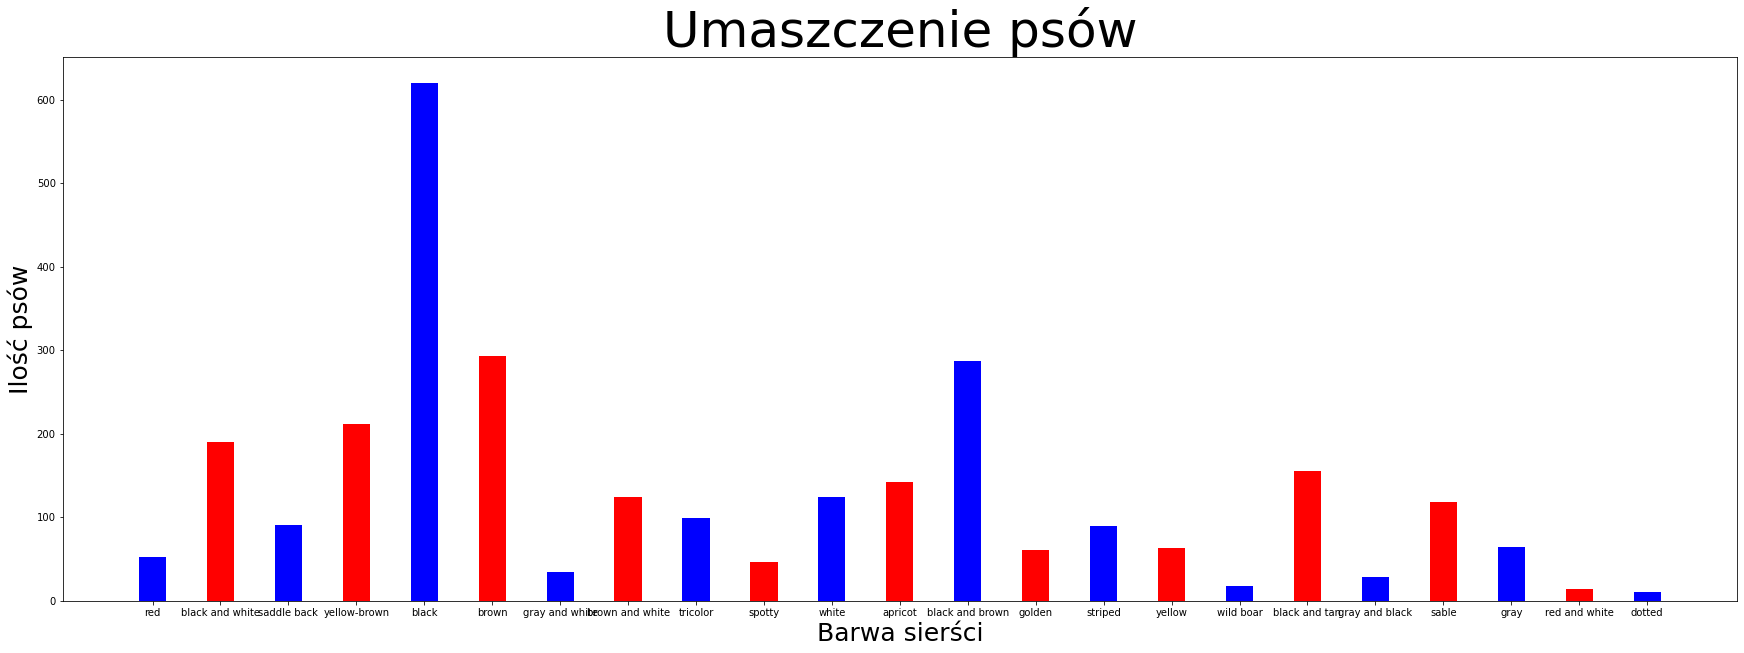

In [16]:
# lista zbioru umaszczeń psów
umaszczenie = list(set(arr[:,8]))

# lista umaszczen i ilosc psów o tym umaszczeniu
w1 = list(arr[:,8])
data = dict([(x, w1.count(x)) for x in w1])

# zmienne x i y do wykresu
kolor = list(data.keys())
values = list(data.values())

# tworzenie elementow wykresu 
ig = plt.figure(figsize = (30,10))
 
# tworzenie wykresu
plt.bar(kolor, values, color =['blue', 'red'],
        width = 0.4)
 
# opis osi i tytuł wykresu    
plt.xlabel("Barwa sierści", size = 25)
plt.ylabel("Ilość psów", size = 25)
plt.title("Umaszczenie psów", size =50)

# rysowanie wykresu
plt.show()

__Raport z przykladowych zadań__

In [17]:
# string wielkosci psów
a = str(df['lubi_ludzi'])
b = str(df[['sex']].describe())
with open("Opis.txt", "w") as file:
    file.write("Analiza statystyczna age \n" + b)
    file.write('\n---\n')
    file.write('\n Dodano kolumne "lubi_ludzi" \n' + a)
    file.write('\n---\n')
    file.write("\n Kolory ubarwienia psow, ktore wykorzystano w wykresie: \n" + str(kolor))